In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


In [ ]:
import os, shutil

In [ ]:
#Veri setinin bulunduğu konumu belirledik.Verilerimiz masaüstünde CucumbersandApples klasörünün içindeymiş.
original_dataset_dir = 'C:/Users/Doruk/Desktop/CucumbersandApples/train'
#Veri setinden alacağımız resimlerin kopyalanacağı konumu belirledik.
base_dir = 'D:/deeplearning'
os.mkdir(base_dir)
#Veri setini kopyalacağımız dosyanın alt bölümleri olan test ,validation ve train  bölümü oluşturuldu.
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
#test,train, validation klasörlerine Cucumbers ve Apples dosyaları oluşturuluyor.
train_cucumbers_dir = os.path.join(train_dir, 'Cucumbers')
os.mkdir(train_cucumbers_dir)

train_apples_dir = os.path.join(train_dir, 'Apples')
os.mkdir(train_apples_dir)

validation_cucumbers_dir = os.path.join(validation_dir, 'Cucumbers')
os.mkdir(validation_cucumbers_dir)

validation_apples_dir = os.path.join(validation_dir, 'Apples')
os.mkdir(validation_apples_dir)

test_cucumbers_dir = os.path.join(test_dir, 'Cucumbers')
os.mkdir(test_cucumbers_dir)

test_apples_dir = os.path.join(test_dir, 'Apples')
os.mkdir(test_apples_dir)
#test validasyon ve train için hangi fotoğrafları alacağını söylüyoruz.
#ben burada 20 test 20 validasyon 60 train ayırıyorum.
fnames = ['apple.{}.JPG'.format(i) for i in range(1,61)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_apples_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['apple.{}.JPG'.format(i) for i in range(61, 81)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_apples_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['apple.{}.JPG'.format(i) for i in range(81, 101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_apples_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cucumber.{}.JPG'.format(i) for i in range(1,61)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cucumbers_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cucumber.{}.JPG'.format(i) for i in range(61, 81)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cucumbers_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cucumber.{}.JPG'.format(i) for i in range(81, 101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cucumbers_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
#Train,validation,test dosyalarındaki fotoğraf sayılarını yazdırdık.
print('total training cucumber images:', len(os.listdir(train_apples_dir)))

In [6]:
print('total training apple images:', len(os.listdir(train_cucumbers_dir)))

total training apple images: 60


In [7]:
print('total validation cucumber images:', len(os.listdir(validation_apples_dir)))

total validation cucumber images: 20


In [8]:
print('total validation apple images:', len(os.listdir(validation_cucumbers_dir)))

total validation apple images: 20


In [9]:
print('total test cucumber images:', len(os.listdir(test_apples_dir)))

total test cucumber images: 20


In [10]:
print('total test apple images:', len(os.listdir(test_cucumbers_dir)))

total test apple images: 20


In [38]:
from keras import layers
from keras import models
#katmanları ekliyoruz
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
##İkili görsel kullanıldığı için activation sigmoid olup çıkışı 1 olur.
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()
#modeli çizdiriyoruz.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 59, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 64)        18496     
__________

In [39]:
#Başarım metriği,loss fonksiyonu, iyileştirici türlerini belirledik. İki farklı tür olduğu için binary_crossentropy kullandık.
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [40]:
from keras.preprocessing.image import ImageDataGenerator

# Tüm fotoğraflar normalize ediliyor.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
       
        train_dir,
        # Train resimleri 250x250 olarak ölçeklendiriliyor
        target_size=(250, 250),
        batch_size=10,
         # iki farklı tür olduğu için binary sınıf modu kullanılır.
        class_mode='binary')
 # Validation resimleri 250x250 boyutunda ölçeklendiriliyor.
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(250, 250),
        batch_size=10,
        class_mode='binary')

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [41]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 250, 250, 3)
labels batch shape: (10,)


In [42]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=5)
#modeli fit ediyoruz.10 epochta her epochta 10 veri alıyormuş.

Epoch 1/10
10/10 [==============================] - 6s 641ms/step - loss: 0.6771 - acc: 0.5800 - val_loss: 0.6463 - val_acc: 0.5000
Epoch 2/10
10/10 [==============================] - 5s 486ms/step - loss: 0.6237 - acc: 0.6800 - val_loss: 0.5547 - val_acc: 0.8250
Epoch 3/10
10/10 [==============================] - 5s 477ms/step - loss: 0.5324 - acc: 0.7900 - val_loss: 0.4697 - val_acc: 0.9000
Epoch 4/10
10/10 [==============================] - 5s 471ms/step - loss: 0.4546 - acc: 0.8600 - val_loss: 0.3858 - val_acc: 0.9250
Epoch 5/10
10/10 [==============================] - 5s 484ms/step - loss: 0.3974 - acc: 0.8600 - val_loss: 0.3020 - val_acc: 0.9250
Epoch 6/10
10/10 [==============================] - 5s 468ms/step - loss: 0.2958 - acc: 0.9500 - val_loss: 0.2878 - val_acc: 0.9250
Epoch 7/10
10/10 [==============================] - 5s 461ms/step - loss: 0.2461 - acc: 0.9100 - val_loss: 0.2117 - val_acc: 0.9250
Epoch 8/10
10/10 [==============================] - 5s 474ms/step - loss: 0.

In [43]:
model.save('model1')
#modeli kaydediyoruz.

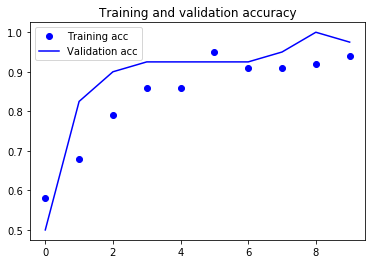

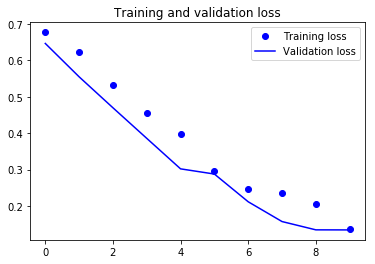

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
#modeli çizdiriyoruz.Training ve validasyon loss ve acc grafiklerini inceliyoruz.
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=4,
      validation_data=validation_generator,
      validation_steps=5)
#Grafikleri yorumlayınca en iyinin 4 epoch olduğunu düşündüm ve epoch sayısını 4 e çektim.

Epoch 1/4
10/10 [==============================] - 5s 497ms/step - loss: 0.1266 - acc: 0.9600 - val_loss: 0.1735 - val_acc: 0.9500
Epoch 2/4
10/10 [==============================] - 5s 475ms/step - loss: 0.1018 - acc: 0.9600 - val_loss: 0.1028 - val_acc: 0.9250
Epoch 3/4
10/10 [==============================] - 5s 472ms/step - loss: 0.1268 - acc: 0.9600 - val_loss: 0.0706 - val_acc: 1.0000
Epoch 4/4
10/10 [==============================] - 5s 479ms/step - loss: 0.0961 - acc: 0.9700 - val_loss: 0.0504 - val_acc: 1.0000


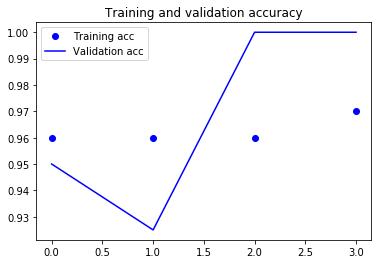

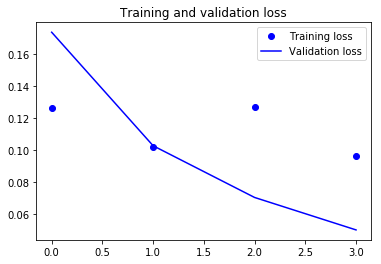

In [46]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
#4 epochlu grafiği çizdirdim.Loss grafiği ilkine göre düştü.Acc ise 1 oldu.Gayet başarılıyız.

In [47]:
model.save('model2')
#bu modelide kaydettim.

In [48]:
#Şimdi aynı kodu drop out ekleyerek yapacağız.drop out overfittingi(ezberi) engellememize yarayacak.
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [49]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/10
10/10 [==============================] - 7s 664ms/step - loss: 0.6655 - acc: 0.6200 - val_loss: 0.5839 - val_acc: 0.6750
Epoch 2/10
10/10 [==============================] - 5s 469ms/step - loss: 0.5400 - acc: 0.7400 - val_loss: 0.4250 - val_acc: 0.9250
Epoch 3/10
10/10 [==============================] - 5s 480ms/step - loss: 0.2624 - acc: 0.9600 - val_loss: 0.1895 - val_acc: 0.9750
Epoch 4/10
10/10 [==============================] - 5s 484ms/step - loss: 0.2563 - acc: 0.8800 - val_loss: 0.1300 - val_acc: 0.9750
Epoch 5/10
10/10 [==============================] - 5s 476ms/step - loss: 0.1511 - acc: 0.9600 - val_loss: 0.1035 - val_acc: 0.9750
Epoch 6/10
10/10 [==============================] - 5s 470ms/step - loss: 0.1060 - acc: 0.9900 - val_loss: 0.0809 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 5s 465ms/step - loss: 0.0667 - acc: 0.9900 - val_loss: 0.1642 - val_acc: 0.9250
Epoch 8/10
10/10 [==============================] - 5s 477ms/step - loss: 0.

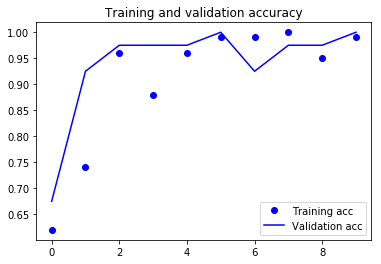

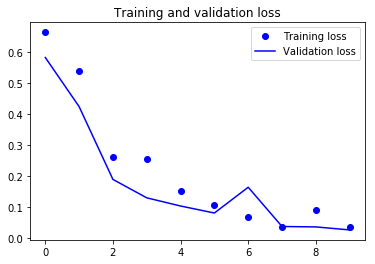

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
#modeli çizdirdik yeniden.

In [51]:
model.save('model3')
#Modeli yeniden kaydettik.

In [52]:
#Modelde olan katmanlara ağırlık regülarizsayonu ekleyerek overfitting’i düşürdük.
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.001),
                        activation='relu', input_shape=(250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3),kernel_regularizer=regularizers.l2(0.001),
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), 
                        activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))

In [53]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [54]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/10
10/10 [==============================] - 8s 782ms/step - loss: 1.7219 - acc: 0.6200 - val_loss: 1.5755 - val_acc: 0.7000
Epoch 2/10
10/10 [==============================] - 5s 508ms/step - loss: 1.5083 - acc: 0.7300 - val_loss: 1.3673 - val_acc: 0.9250
Epoch 3/10
10/10 [==============================] - 5s 509ms/step - loss: 1.3727 - acc: 0.7700 - val_loss: 1.2064 - val_acc: 0.9250
Epoch 4/10
10/10 [==============================] - 5s 550ms/step - loss: 1.1353 - acc: 0.9300 - val_loss: 1.0561 - val_acc: 0.9500
Epoch 5/10
10/10 [==============================] - 5s 502ms/step - loss: 1.0305 - acc: 0.9200 - val_loss: 0.9373 - val_acc: 0.9750
Epoch 6/10
10/10 [==============================] - 5s 514ms/step - loss: 0.9546 - acc: 0.9300 - val_loss: 1.2645 - val_acc: 0.6500
Epoch 7/10
10/10 [==============================] - 5s 546ms/step - loss: 0.8991 - acc: 0.9200 - val_loss: 0.8354 - val_acc: 0.9750
Epoch 8/10
10/10 [==============================] - 6s 564ms/step - loss: 0.

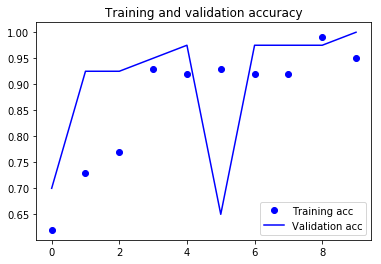

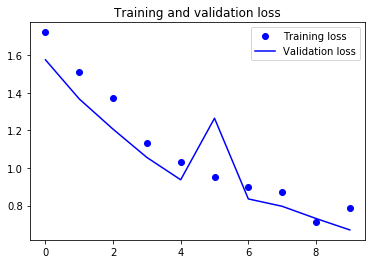

In [55]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
model.save('model4')
#Modeli yeniden kaydettik.

In [57]:
#Buradan sonra son adım olan data augmentationu yani veri setini büyütmeyi yapıyoruz.
datagen = ImageDataGenerator(
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

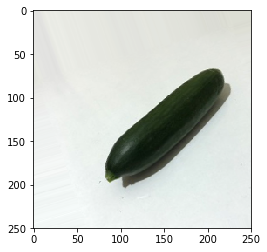

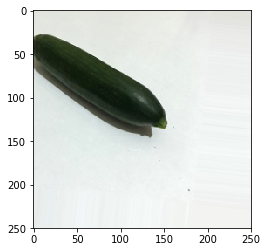

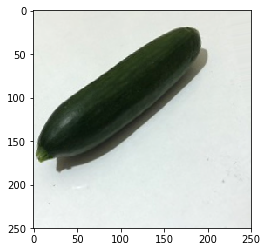

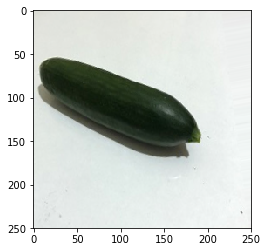

In [58]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join(train_cucumbers_dir, fname) for fname in os.listdir(train_cucumbers_dir)]

img_path = fnames[15]

img = image.load_img(img_path, target_size = (250, 250))

x = image.img_to_array(img)
#Resimleri yeniden şekillendiriyoruz.
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [59]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                train_dir,
                                target_size = (250, 250),
                                batch_size = 5,
                                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                validation_dir,
                                target_size = (250, 250),
                                batch_size = 5,
                                class_mode = 'binary')
#Büyütülmüş yeni verileri yeniden eğitiyoruz.
history = model.fit_generator(
                            train_generator,
                            steps_per_epoch = 10,
                            epochs = 10,
                            validation_data = validation_generator,
                            validation_steps = 5)

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 4s 410ms/step - loss: 0.9149 - acc: 0.8400 - val_loss: 0.8922 - val_acc: 0.8750
Epoch 2/10
10/10 [==============================] - 4s 370ms/step - loss: 0.8585 - acc: 0.8800 - val_loss: 0.6528 - val_acc: 1.0000
Epoch 3/10
10/10 [==============================] - 4s 399ms/step - loss: 0.7897 - acc: 0.9200 - val_loss: 0.5963 - val_acc: 1.0000
Epoch 4/10
10/10 [==============================] - 4s 378ms/step - loss: 0.8046 - acc: 0.8800 - val_loss: 0.5793 - val_acc: 1.0000
Epoch 5/10
10/10 [==============================] - 4s 351ms/step - loss: 0.7008 - acc: 0.9600 - val_loss: 0.5591 - val_acc: 1.0000
Epoch 6/10
10/10 [==============================] - 4s 388ms/step - loss: 0.6778 - acc: 0.9600 - val_loss: 0.5432 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 4s 359ms/step - loss: 0.6308 - acc: 0.9600 - val_loss: 0.5271 - val_acc: 1.

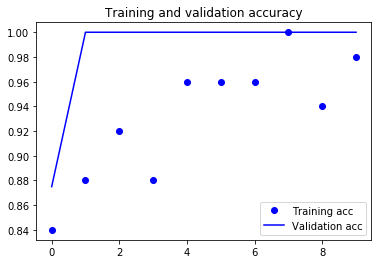

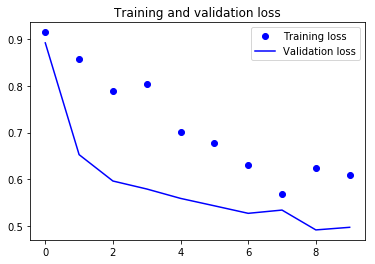

In [60]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
#Son olarak yeni veri setlerinin loss ve acc grafiğini çizdiriyoruz.

In [61]:
model.save('model5')